In [224]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import math
import seaborn as sns

In [225]:
def u(x,a,s):
    if a == 0:
        return (1/6*s)*x + 0.5
    else: 
        def b(x):
            return 1-math.e**(-a*x)
        return (b(x)-b(-3*s))/(b(3*s)-b(-3*s))
    
def us(x_list, a, s): #utility function for the list of values           
    return [u(x, a, s) for x in x_list]

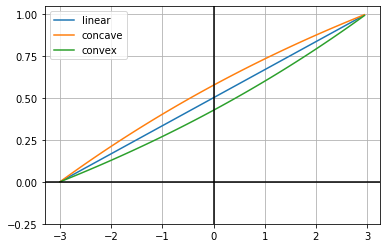

In [226]:
X = np.arange(-3,3,0.05)
Y1 = [u(x,0.1,1) for x in X]
Y2 = [u(x,-0.1,1) for x in X]
Y3 = [u(x,0,1) for x in X] 
plt.plot(X,Y3, label='linear') 
plt.plot(X,Y1, label='concave') 
plt.plot(X,Y2, label='convex') 
plt.axvline(0, color='k')
plt.axhline(0, color='k')

import matplotlib.ticker as plticker


plt.yticks(np.arange(-.25, 1.25, 0.25))

plt.grid(which='major', axis='both', linestyle='-')
plt.legend()

## Selection Bias - single attribute 

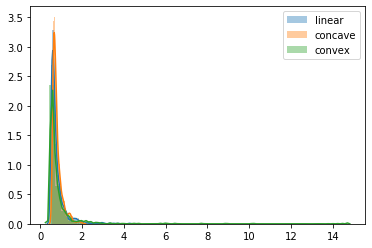

In [248]:
xs = np.random.lognormal(0, 1, 1000)
sns.distplot(us(xs, 0, 1), label='linear')
sns.distplot(us(xs, 0.1, 1), label='concave')
sns.distplot(us(xs, -0.1, 1), label='convex')
plt.legend()

In [249]:
max_dict = {}


for m in [2,3,5,10]:
    max_list = []
    for k in  range(1000):
        max_list.append(max(us(np.random.lognormal(0,1,m), 0, 1)))
        
    max_dict[m] = max_list

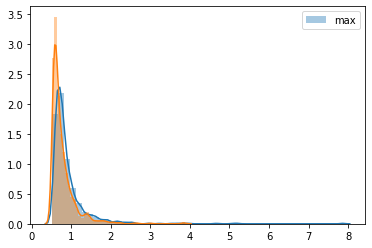

In [254]:
sns.distplot(max_dict[2], label='max')
sns.distplot(us(np.random.lognormal(0,1,1000), 0, 1))
plt.legend()

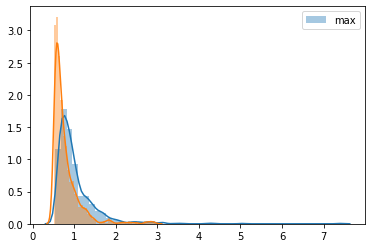

In [255]:
sns.distplot(max_dict[3], label='max')
sns.distplot(us(np.random.lognormal(0,1,1000), 0, 1))
plt.legend()

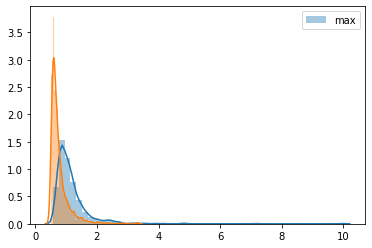

In [256]:
sns.distplot(max_dict[5], label='max')
sns.distplot(us(np.random.lognormal(0,1,1000), 0, 1))
plt.legend()

In [321]:
max_dict = {}


for m in [2,3,5,10]:
    max_list = []
    for k in  range(1000):
        max_list.append(max(us(np.random.lognormal(0,1,m), -0.1, 1)))
        
    max_dict[m] = max_list

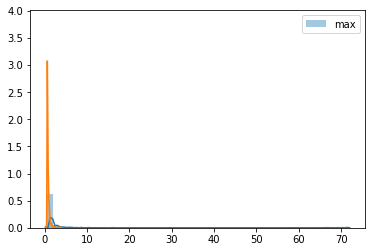

In [322]:
sns.distplot(max_dict[5], label='max')
sns.distplot(us(np.random.lognormal(0,1,1000), 0, 1))
plt.legend()

In [323]:
def cal_post_ln_r(m, mu=0, s=1, t=1, a=0):
    d_list = []
    x_list = []
    y_list = []
    uxmaxj = []
    maxuy = []
    for i in range(10000):
        #Generate $m$ true values $x_j$ from the prior
        x = np.random.lognormal(mu,s,m) #x_j~N(0,1)
        u_x = us(x, a, s)
        x_list.append(x)
        
        #For each true value, generate an estimate $y_j$ from the likelihood 
        y = [np.random.lognormal(math.log(x_j) - ((t**2)/2),t,1)[0] for x_j in x] #y_j~N(x_j,1)
        u_y = us(y, a, s)
        y_list.append(y)
        
        max_uy = max(u_y)
        max_j = u_y.index(max_uy)
        
        uxmaxj.append(u_x[max_j])
        maxuy.append(max_uy)

        d = (u_x[max_j] - max_uy)/max_uy
        
        d_list.append(d)
    #Compute the difference $u(x_\tilde{j})-\sum_{k=1}^1000 u_(x_\tilde{j}k)$
    return d_list, x_list, y_list, uxmaxj, maxuy


In [270]:
def cal_post_ln(m, mu=0, s=1, t=1, a=0):
    d_list = []
    x_list = []
    y_list = []
    uxmaxj = []
    maxuy = []
    for i in range(10000):
        #Generate $m$ true values $x_j$ from the prior
        x = np.random.lognormal(mu,s,m) #x_j~N(0,1)
        u_x = us(x, a, s)
        x_list.append(x)
        
        #For each true value, generate an estimate $y_j$ from the likelihood 
        y = [np.random.lognormal(math.log(x_j) - ((t**2)/2),t,1)[0] for x_j in x] #y_j~N(x_j,1)
        u_y = us(y, a, s)
        y_list.append(y)
        
        max_uy = max(u_y)
        max_j = u_y.index(max_uy)
        
        uxmaxj.append(u_x[max_j])
        maxuy.append(max_uy)

        d = (u_x[max_j] - max_uy)
        
        d_list.append(d)
    #Compute the difference $u(x_\tilde{j})-\sum_{k=1}^1000 u_(x_\tilde{j}k)$
    return d_list, x_list, y_list, uxmaxj, maxuy


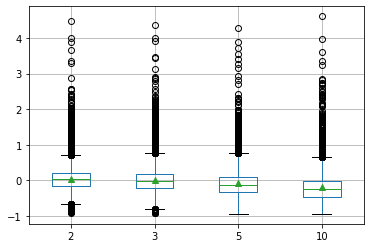

2     0.048115
3     0.003643
5    -0.078135
10   -0.186909
dtype: float64


In [324]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_ln_r(m, a=0)[0]
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

In [314]:
r = cal_post_ln(2, a=0)

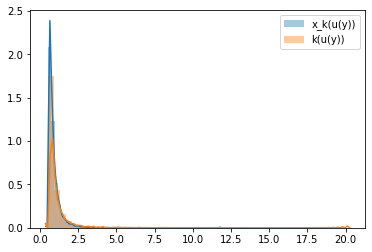

In [315]:
sns.distplot(np.array(r[3]), label="x_k(u(y))")
sns.distplot(np.array(r[4]), label="k(u(y))")
plt.legend()

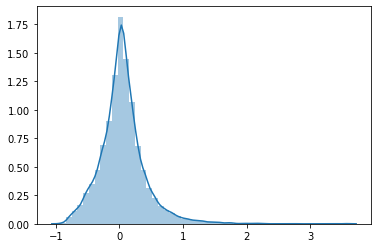

In [265]:
sns.distplot((np.array(r[3])-np.array(r[4]))/np.array(r[4]))

In [316]:
np.mean((np.array(r[3])-np.array(r[4]))/np.array(r[4]))

0.05124660740683105

In [317]:
np.mean((np.array(r[3])-np.array(r[4])))

-0.07203466996887753

In [319]:
np.mean(np.array(r[4]))

0.95449762714961

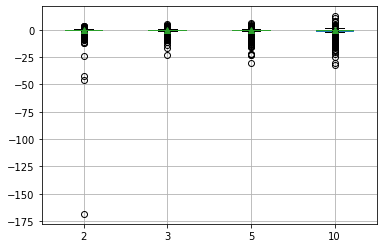

2    -0.106079
3    -0.144702
5    -0.315248
10   -0.615746
dtype: float64


In [271]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_ln(m, a=0)[0]
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

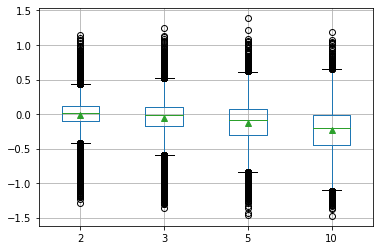

2    -0.010410
3    -0.053692
5    -0.122986
10   -0.230184
dtype: float64


In [320]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_ln(m, a=0.1)[0]
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

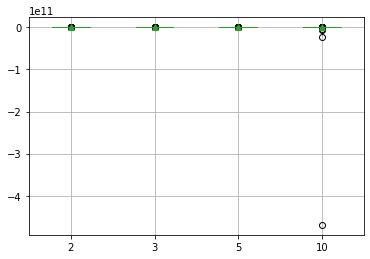

2    -9.603088e+00
3    -9.871150e+02
5    -1.028045e+04
10   -5.029549e+07
dtype: float64


In [274]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_ln(m, a=-0.1)[0]
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

## Selection Bias - multi attribute 

In [275]:
def cal_post_mu(m=5, mu=[0,0,0], s=[1,1,1], t=[1,1,1], w=[1/3, 1/3, 1/3], a=[0,0,0]):
    
    def cal_u(multiatt):
        ul = [u(multiatt[i], a[i], 1) for i in range(len(multiatt))]
        return np.dot(w, ul)
    
    d_list = []
    for k in range(50000):
        x = []
        eu = []
        
        for j in range(m): #loop for generating mu alternatives
            
            n = len(mu) #number of attributes
            x_j = [np.random.lognormal(mu[i], s[i],1)[0] for i in range(n)] #generate true mu of one alternative
            x.append(cal_u(x_j)) #append the utility of one mu alternative u(x_j)
            
            y_j = [np.random.lognormal(math.log(x_j[i]) - ((t[i]**2)/2), t[i],1)[0] for i in range(n)] #generate estimated mu of one alternative
            eu.append(cal_u(y_j)) #append the utility of one mu estimates u(y_j)

        #Choose the alternative $j^$ with the highest expected utility
        max_eu = max(eu)
        max_j = eu.index(max_eu)

        #posterior disappointment 
        d = (x[max_j] - max_eu)#/max_eu
        d_list.append(d)
        #Compute the difference $u(x_\tilde{j})-\sum_{k=1}^1000 u_(x_\tilde{j}k)$
    return d_list

# Varying number of alternatives

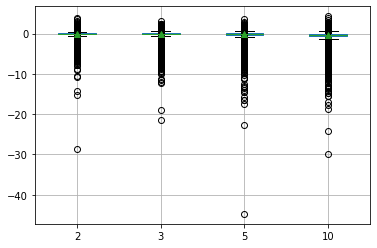

2    -0.074997
3    -0.137654
5    -0.246311
10   -0.445410
dtype: float64


In [276]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

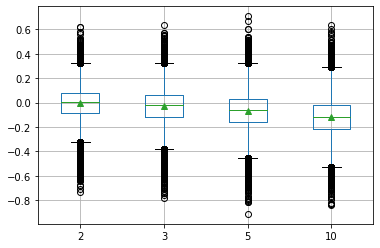

2    -0.004833
3    -0.030497
5    -0.065617
10   -0.116988
dtype: float64


In [277]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m, a = [0.1]*3)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

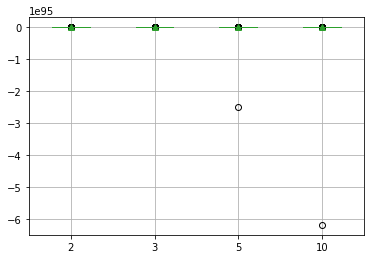

2    -4.317405e+08
3    -9.758778e+11
5    -4.977574e+90
10   -1.234118e+91
dtype: float64


In [278]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m, a = [-0.1]*3)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

# varying number of attributes 

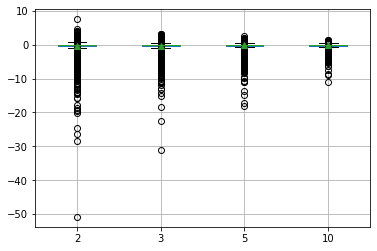

2    -0.274697
3    -0.246923
5    -0.213953
10   -0.164905
dtype: float64


In [279]:
d = {}
for n in [2,3,5,10]:
    d[n] = cal_post_mu(m=5, mu=[0]*n,s=[1]*n, t=[1]*n, w=[1/n]*n, a=[0]*n )
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

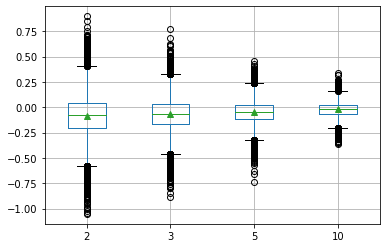

2    -0.086383
3    -0.067988
5    -0.044660
10   -0.022421
dtype: float64


In [280]:
d = {}
for n in [2,3,5,10]:
    d[n] = cal_post_mu(m=5, mu=[0]*n,s=[1]*n, t=[1]*n, w=[1/n]*n, a=[0.1]*n )
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

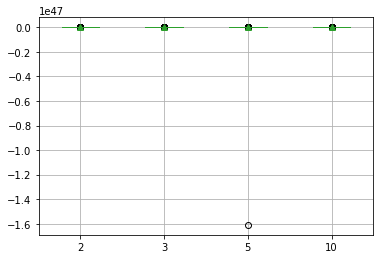

2    -4.370408e+07
3    -1.293997e+13
5    -3.218875e+42
10   -1.413337e+15
dtype: float64


In [281]:
d = {}
for n in [2,3,5,10]:
    d[n] = cal_post_mu(m=5, mu=[0]*n,s=[1]*n, t=[1]*n, w=[1/n]*n, a=[-0.1]*n )
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

# Varying criterion-specific uncertainty

## attribute specific absolute disappointment

In [298]:
def cal_post_mu(m=5, mu=[0,0,0], s=[1,1,1], t=[1,1,1], w=[1/3, 1/3, 1/3], a=[0,0,0]):
    
    def cal_u(multiatt):
        ul = [u(multiatt[i], a[i], 1) for i in range(len(multiatt))]
        return np.dot(w, ul)
    
    d_list = []
    d_mu_list = []
    
    mxlist = []
    mylist = []
    for k in range(10000):
        x = []
        eu = []
        
        mx = []
        meu = []
        for j in range(m): #loop for generating mu alternatives
            
            n = len(mu) #number of attributes
            x_j = [np.random.lognormal(mu[i], s[i],1)[0] for i in range(n)] #generate true mu of one alternative
            x.append(cal_u(x_j)) #append the utility of one mu alternative u(x_j)           
            ux_j= np.array([u(x_j[i], a[i],1) for i in range(n)]) #utilities of individual attributes
            mx.append(ux_j)
            
            y_j = [np.random.lognormal(math.log(x_j[i]) -((t[i]**2)/2), t[i],1)[0] for i in range(n)] #generate estimated mu of one alternative            
            eu.append(cal_u(y_j)) #append the utility of one mu estimates u(y_j)
            uy_j = np.array([u(y_j[i], a[i],1) for i in range(n)]) #utilities of individual attributes
            meu.append(uy_j)
            
        #Choose the alternative $j^$ with the highest expected utility
        max_eu = max(eu)
        max_j = eu.index(max_eu)

        #disappointment 
        d = (x[max_j] - max_eu)#/max_eu
        d_mu = (mx[max_j]-meu[max_j])#/meu[max_j]
        d_list.append(d)
        d_mu_list.append(d_mu)
        
        
        mxlist.append(x[max_j])
        mylist.append(max_eu)
        
        #Compute the difference $u(x_\tilde{j})-\sum_{k=1}^1000 u_(x_\tilde{j}k)$
    return d_list, d_mu_list, mxlist, mylist

In [305]:
r= cal_post_mu(m=5, mu=[0]*n, s=[1]*n, t=[1, 1,1,1,1], w=[1/n]*n, a=[0]*n )
r2= cal_post_mu(m=5, mu=[0]*n, s=[1]*n, t=[1, 1,3,1,1], w=[1/n]*n, a=[0]*n )

In [311]:
r3= cal_post_mu(m=5, mu=[0]*n, s=[1]*n, t=[1, 1,5,1,1], w=[1/n]*n, a=[0]*n )

-0.21239326135673328


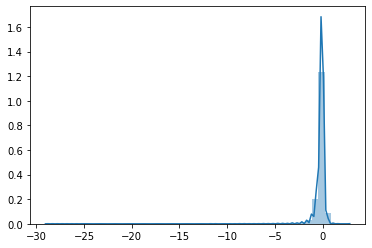

In [308]:
sns.distplot(np.array(r[2])-np.array(r[3]), label='1')
print(np.mean(np.array(r[2])-np.array(r[3])))

-0.32040302148125743


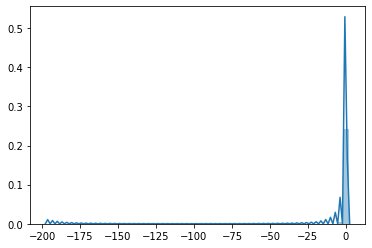

In [310]:
sns.distplot(np.array(r2[2])-np.array(r2[3]), label='1')
print(np.mean(np.array(r2[2])-np.array(r2[3])))


-0.1508911111850379


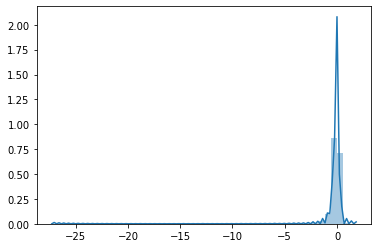

In [312]:
sns.distplot(np.array(r3[2])-np.array(r3[3]), label='1')
print(np.mean(np.array(r3[2])-np.array(r3[3])))


## overall disappointment

Varying attribute-specific estimation uncertainty 

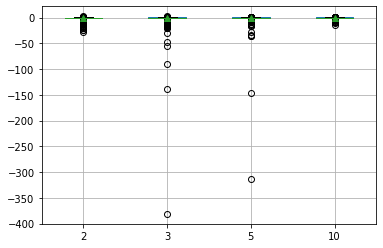

2    -0.283960
3    -0.308969
5    -0.209379
10   -0.132436
dtype: float64


In [297]:
n = 5
d = {}
for s2 in [2,3,5,10]:
    d[s2] = cal_post_mu(m=5, mu=[0]*n, s=[1]*n, t=[s2, 1,1,1,1], w=[1/n]*n, a=[0]*n )[0]

df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

Varying attribute-specific weight

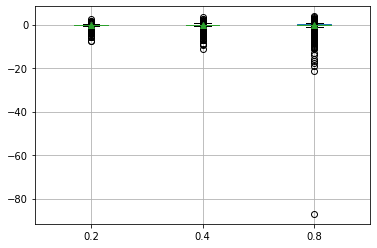

0.2   -0.210316
0.4   -0.222573
0.8   -0.283178
dtype: float64


In [284]:
n = 5

w1=[1/n]*5
w2=[0.4, 0.15, 0.15, 0.15, 0.15]
w3=[0.8, 0.05, 0.05, 0.05, 0.05]

d = {}
for wi in [w1, w2, w3]:
    d[wi[0]] = cal_post_mu(m=5, mu=[0]*n, s=[1]*n, t=[1]*n, w=wi, a=[0]*n )[0]
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

## attribute specific absolute disappointment

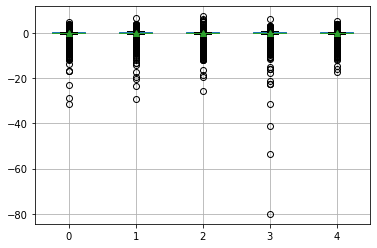

0   -0.200250
1   -0.206197
2   -0.198787
3   -0.237279
4   -0.205268
dtype: float64


In [285]:
n = 5
r = cal_post_mu(m=5, mu=[0]*n,s=[1]*n, t=[1]*n, w=[1/n]*n, a=[0]*n )
df = pd.DataFrame(r[1])
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

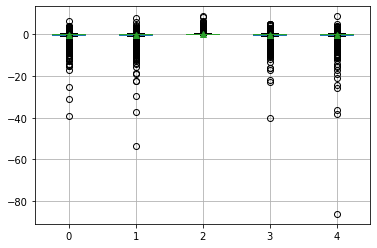

0   -0.223673
1   -0.219069
2    0.276462
3   -0.222119
4   -0.226586
dtype: float64


In [295]:
n = 5
r = cal_post_mu(m=5, mu=[0]*n,s=[1]*n, t=[1,1,10,1,1], w=[1/n]*n, a=[0]*n )
df = pd.DataFrame(r[1])
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

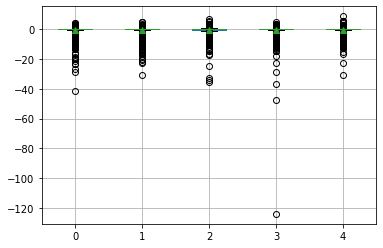

0   -0.148920
1   -0.128487
2   -0.292978
3   -0.163882
4   -0.133099
dtype: float64


In [287]:
n = 5
r = cal_post_mu(m=5, mu=[0]*n,s=[1]*n, t=[1]*n, w=[0.1, 0.1, 0.6, 0.1, 0.1], a=[0]*n )
df = pd.DataFrame(r[1])
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

## attribute specific relative disappointment

In [288]:
def cal_post_mu2(m=5, mu=[0,0,0], s=[1,1,1], t=[1,1,1], w=[1/3, 1/3, 1/3], a=[0,0,0]):
    
    def cal_u(multiatt):
        ul = [u(multiatt[i], a[i], 1) for i in range(len(multiatt))]
        return np.dot(w, ul)
    
    d_list = []
    d_mu_list = []
    for k in range(10000):
        x = []
        eu = []
        
        mx = []
        meu = []
        for j in range(m): #loop for generating mu alternatives
            
            n = len(mu) #number of attributes
            x_j = [np.random.lognormal(mu[i], s[i],1)[0] for i in range(n)] #generate true mu of one alternative
            x.append(cal_u(x_j)) #append the utility of one mu alternative u(x_j)           
            ux_j= np.array([u(x_j[i], a[i],1) for i in range(n)]) #utilities of individual attributes
            mx.append(ux_j)
            
            y_j = [np.random.lognormal(math.log(x_j[i])-((t[i]**2)/2), t[i],1)[0] for i in range(n)] #generate estimated mu of one alternative            
            eu.append(cal_u(y_j)) #append the utility of one mu estimates u(y_j)
            uy_j = np.array([u(y_j[i], a[i],1) for i in range(n)]) #utilities of individual attributes
            meu.append(uy_j)
            
        #Choose the alternative $j^$ with the highest expected utility
        max_eu = max(eu)
        max_j = eu.index(max_eu)

        #disappointment 
        d = (x[max_j] - max_eu)/max_eu
        d_mu = (mx[max_j]-meu[max_j])/meu[max_j]
        d_list.append(d)
        d_mu_list.append(d_mu)
        
        #Compute the difference $u(x_\tilde{j})-\sum_{k=1}^1000 u_(x_\tilde{j}k)$
    return d_list, d_mu_list

## overall disappointment

Varying attribute-specific estimation uncertainty 

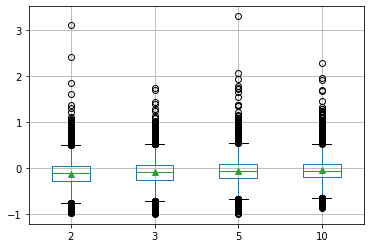

2    -0.124167
3    -0.099698
5    -0.059482
10   -0.054171
dtype: float64


In [289]:
n = 5
d = {}
for s2 in [2,3,5,10]:
    d[s2] = cal_post_mu2(m=5, mu=[0]*n, s=[1]*n, t=[1,1,s2,1,1], w=[1/n]*n, a=[0]*n )[0]

df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

Varying attribute-specific weight

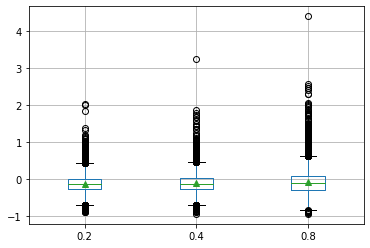

0.2   -0.130550
0.4   -0.122717
0.8   -0.093190
dtype: float64


In [290]:
n = 5

w1=[1/n]*5
w2=[0.4, 0.15, 0.15, 0.15, 0.15]
w3=[0.8, 0.05, 0.05, 0.05, 0.05]

d = {}
for wi in [w1, w2, w3]:
    d[wi[0]] = cal_post_mu2(m=5, mu=[0]*n, s=[1]*n, t=[1]*n, w=wi, a=[0]*n )[0]
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

Attribute-specific

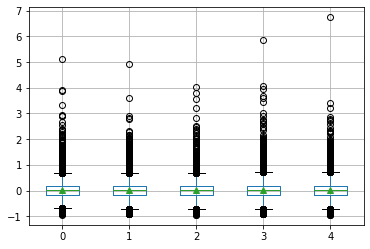

0    0.023758
1    0.014113
2    0.016895
3    0.024616
4    0.016153
dtype: float64


In [291]:
n = 5
r = cal_post_mu2(m=5, mu=[0]*n,s=[1]*n, t=[1,1,1,1,1], w=[1/n]*n, a=[0]*n )
df = pd.DataFrame(r[1])
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

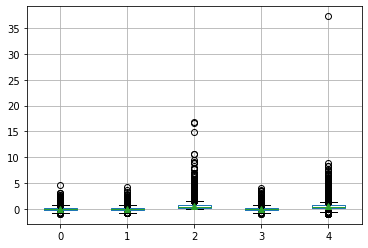

0   -0.006059
1   -0.012980
2    0.563021
3   -0.004822
4    0.523760
dtype: float64


In [292]:
n = 5
r = cal_post_mu2(m=5, mu=[0]*n,s=[1]*n, t=[1,1,10,1,5], w=[1/n]*n, a=[0]*n )
df = pd.DataFrame(r[1])
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

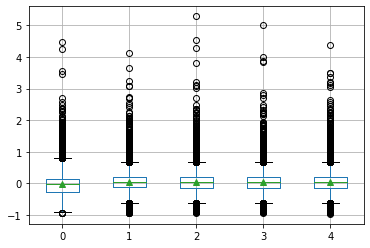

0   -0.026653
1    0.042010
2    0.039033
3    0.034027
4    0.037280
dtype: float64


In [293]:
n = 5

w1=[1/n]*5
w2=[0.4, 0.15, 0.15, 0.15, 0.15]
w3=[0.8, 0.05, 0.05, 0.05, 0.05]

r = cal_post_mu2(m=5, mu=[0]*n, s=[1]*n, t=[1]*n, w=w2, a=[0]*n)
df = pd.DataFrame(r[1])
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

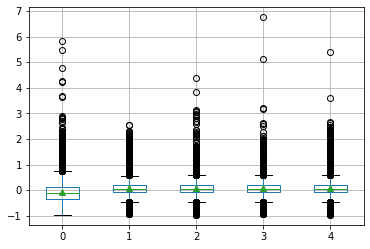

0   -0.067374
1    0.073739
2    0.075065
3    0.072266
4    0.078504
dtype: float64


In [294]:
n = 5

w1=[1/n]*5
w2=[0.4, 0.15, 0.15, 0.15, 0.15]
w3=[0.8, 0.05, 0.05, 0.05, 0.05]

r = cal_post_mu2(m=5, mu=[0]*n, s=[1]*n, t=[1]*n, w=w3, a=[0]*n)
df = pd.DataFrame(r[1])
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))